応用情報工学演習 -- OpenCVによる様々な画像処理

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#（情報工学実験3の復習）微分フィルタ" data-toc-modified-id="（情報工学実験3の復習）微分フィルタ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>（情報工学実験3の復習）微分フィルタ</a></span><ul class="toc-item"><li><span><a href="#一次微分フィルタ" data-toc-modified-id="一次微分フィルタ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>一次微分フィルタ</a></span><ul class="toc-item"><li><span><a href="#Sobelフィルタ" data-toc-modified-id="Sobelフィルタ-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Sobelフィルタ</a></span></li></ul></li><li><span><a href="#二次微分フィルタ" data-toc-modified-id="二次微分フィルタ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>二次微分フィルタ</a></span><ul class="toc-item"><li><span><a href="#ラプラシアンフィルタ" data-toc-modified-id="ラプラシアンフィルタ-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>ラプラシアンフィルタ</a></span></li></ul></li></ul></li><li><span><a href="#Cannyエッジ検出" data-toc-modified-id="Cannyエッジ検出-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cannyエッジ検出</a></span></li><li><span><a href="#Harrisコーナー検出" data-toc-modified-id="Harrisコーナー検出-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Harrisコーナー検出</a></span></li><li><span><a href="#２値画像処理" data-toc-modified-id="２値画像処理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>２値画像処理</a></span><ul class="toc-item"><li><span><a href="#閾値処理" data-toc-modified-id="閾値処理-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>閾値処理</a></span></li><li><span><a href="#収縮と膨張" data-toc-modified-id="収縮と膨張-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>収縮と膨張</a></span></li><li><span><a href="#オープニングとクロージング" data-toc-modified-id="オープニングとクロージング-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>オープニングとクロージング</a></span></li></ul></li><li><span><a href="#輪郭検出" data-toc-modified-id="輪郭検出-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>輪郭検出</a></span></li><li><span><a href="#ハフ変換" data-toc-modified-id="ハフ変換-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ハフ変換</a></span><ul class="toc-item"><li><span><a href="#直線検出" data-toc-modified-id="直線検出-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>直線検出</a></span></li><li><span><a href="#円検出" data-toc-modified-id="円検出-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>円検出</a></span></li></ul></li><li><span><a href="#ノイズ除去" data-toc-modified-id="ノイズ除去-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ノイズ除去</a></span></li><li><span><a href="#Inpainting処理" data-toc-modified-id="Inpainting処理-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Inpainting処理</a></span></li><li><span><a href="#テンプレートマッチング" data-toc-modified-id="テンプレートマッチング-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>テンプレートマッチング</a></span></li><li><span><a href="#前景背景領域分割" data-toc-modified-id="前景背景領域分割-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>前景背景領域分割</a></span></li><li><span><a href="#背景差分" data-toc-modified-id="背景差分-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>背景差分</a></span></li><li><span><a href="#オプティカルフロー" data-toc-modified-id="オプティカルフロー-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>オプティカルフロー</a></span></li></ul></div>

# （情報工学実験3の復習）微分フィルタ
## 一次微分フィルタ
**一次微分フィルタ** (image derivative filter)は，画像中で明るさが急に変化する**エッジ**(edge)を取り出すときに使われるフィルタである．
グレースケール画像の画素を$x$方向，$y$方向に順に見ていったとき，明るさ（画素値）の差分を出力する．
差分の計算にはいくつかのバリエーションがあるが，もっとも単純なのは隣接画素の差分
$$ \Delta_x f(i, j) = f(i, j) - f(i-1, j), \;\; \mbox{($x$軸方向の差分)}\\
   \Delta_y f(i, j) = f(i, j) - f(i,j-1)\;\; \mbox{($y$軸方向の差分)}
$$
をとる方法である．
$(\Delta_x f(i, j), \Delta_y f(i, j))$を画像$f$の**勾配** (gradient), 勾配$(\Delta_x f(i, j), \Delta_y f(i, j))$の**大きさ**
$\sqrt{(\Delta_x f(i, j))^2 + (\Delta_y f(i, j))^2}$を**エッジ強度**とよぶ．

x方向，y方向の一次微分フィルタ：
$$
\begin{array}{|c|c|c|}
\hline
0 & 0 & 0\\ \hline
-1 & 1 & 0\\ \hline
0 & 0 & 0\\ \hline
\end{array}
\;\;
\begin{array}{|c|c|c|}
\hline
0 & -1 & 0\\ \hline
0 & 1 & 0\\ \hline
0 & 0 & 0\\ \hline
\end{array}
$$
となる．
エッジ強度があるしきい値より大きな値をとる点を
エッジ点として抽出することができる．

### Sobelフィルタ
上記の一次微分フィルタは，ノイズに対して大きく反応してしまう欠点がある．ノイズを抑えながらエッジを抽出するために，平滑化フィルタと組み合わせた空間フィルタとしてSobelフィルタが用いられる．

x方向とy方向のSobelフィルタ：
$$
\begin{array}{|c|c|c|}
\hline
-1 & 0 & 1\\ \hline
-2 & 0 & 2\\ \hline
-1 & 0 & 1\\ \hline
\end{array}
\;\;
\begin{array}{|c|c|c|}
\hline
-1 & -2 & -1\\ \hline
0 & 0 & 0\\ \hline
1 & 2 & 1\\ \hline
\end{array}
$$
と表される．

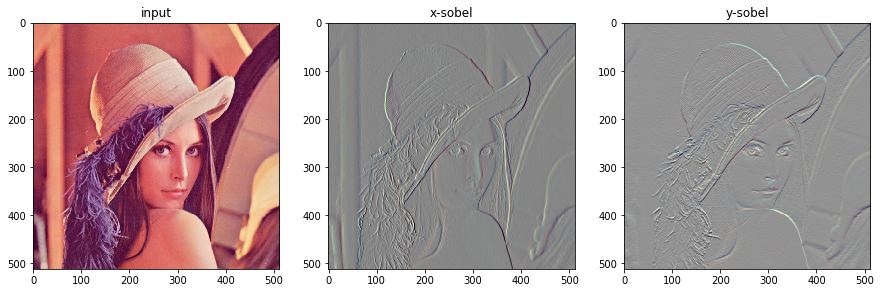

In [22]:
import sys
sys.path += ['/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
             '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
             '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
             '/Users/278mt/Library/Python/3.7/lib/python/site-packages',
             '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages']
import numpy as np
import cv2
from matplotlib.pyplot import *
%matplotlib inline

img = cv2.imread('data/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換
xSobel = cv2.Sobel(img, cv2.CV_64F, 1, 0) # 負の値に対応するため64bit floatにする
ySobel = cv2.Sobel(img, cv2.CV_64F, 0, 1) # 負の値に対応するため64bit floatにする

### 以下，表示用コード ###
# 表示のために0～1の範囲に正規化
MIN = np.min(xSobel) 
MAX = np.max(xSobel)
xSobel = (xSobel-MIN)/(MAX-MIN)

# 表示のために0～1の範囲に正規化
MIN = np.min(ySobel) 
MAX = np.max(ySobel)
ySobel = (ySobel-MIN)/(MAX-MIN)

matplotlib.pyplot.rcParams['figure.figsize'] = (15.0, 15.0) # 画像を大きく表示
subplot(1,3,1)
title('input')
imshow(img)
subplot(1,3,2)
title('x-sobel')
imshow(xSobel)
subplot(1,3,3)
title('y-sobel')
imshow(ySobel)

## 二次微分フィルタ

画像の二次微分は，上で説明した一次微分の微分（差分）をとったもの
$$
\begin{eqnarray*}
\Delta_x^2 f(i, j) &=&(f(i+1, j) - f(i, j)) - (f(i, j) - f(i-1,j)) = f(i+1, j) - 2f(i, j) + f(i-1, j)\\
\Delta_y^2 f(i, j) &=&(f(i, j+1) - f(i, j)) - (f(i, j) - f(i, j-1)) = f(i, j+1) - 2f(i, j) + f(i, j-1)
\end{eqnarray*}
$$
と考えることができる．

したがって，x方向，y方向の二次微分フィルタは
$$
\begin{array}{|c|c|c|}
\hline
0 & 0 & 0\\ \hline
1 & -2 & 1\\ \hline
0 & 0 & 0\\ \hline
\end{array}
\;\;
\begin{array}{|c|c|c|}
\hline
0 & 1 & 0\\ \hline
0 & -2 & 0\\ \hline
0 & 1 & 0\\ \hline
\end{array}
$$


### ラプラシアンフィルタ

一般に，関数$f(x, y)$のラプラシアンは
$$
\frac{\partial^2}{\partial x^2} f(x, y) + \frac{\partial^2}{\partial y^2} f(x, y)
$$
と定義される．デジタル画像のラプラシアンフィルタはx方向，y方向の二次微分フィルタの和として定義する：
$$
\begin{array}{|c|c|c|}
\hline
0 & 0 & 0\\ \hline
1 & -2 & 1\\ \hline
0 & 0 & 0\\ \hline
\end{array}
+
\begin{array}{|c|c|c|}
\hline
0 & 1 & 0\\ \hline
0 & -2 & 0\\ \hline
0 & 1 & 0\\ \hline
\end{array}
=
\begin{array}{|c|c|c|}
\hline
0 & 1 & 0\\ \hline
1 & -4 & 1\\ \hline
0 & 1 & 0\\ \hline
\end{array}
$$
ラプラシアンを使うと，方向によらずエッジを抽出することができる．

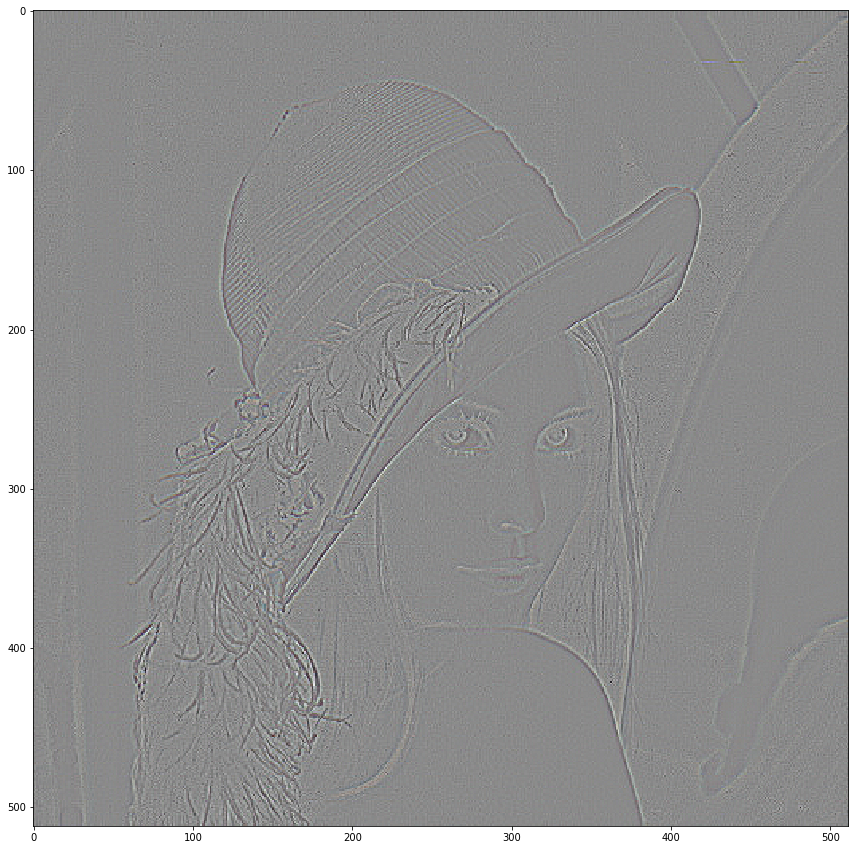

[[[0.53463203 0.53463203 0.53463203]
  [0.54545455 0.54329004 0.54329004]
  [0.54112554 0.54761905 0.54761905]
  ...
  [0.504329   0.53679654 0.53030303]
  [0.51515152 0.53679654 0.53463203]
  [0.60822511 0.64285714 0.63419913]]

 [[0.54545455 0.54545455 0.54545455]
  [0.54329004 0.54329004 0.54329004]
  [0.54545455 0.54112554 0.54112554]
  ...
  [0.49134199 0.49134199 0.48917749]
  [0.52380952 0.51298701 0.51515152]
  [0.68398268 0.68398268 0.67965368]]

 [[0.54329004 0.54545455 0.53896104]
  [0.54761905 0.54978355 0.54329004]
  [0.53463203 0.53679654 0.53030303]
  ...
  [0.52380952 0.50865801 0.51298701]
  [0.53896104 0.51731602 0.51731602]
  [0.66017316 0.66666667 0.65800866]]

 ...

 [[0.54761905 0.54545455 0.55194805]
  [0.57792208 0.56926407 0.57575758]
  [0.51515152 0.52164502 0.52164502]
  ...
  [0.53246753 0.52813853 0.54112554]
  [0.54545455 0.54545455 0.54112554]
  [0.54761905 0.56709957 0.57359307]]

 [[0.55411255 0.55627706 0.54978355]
  [0.57792208 0.57575758 0.56277056]


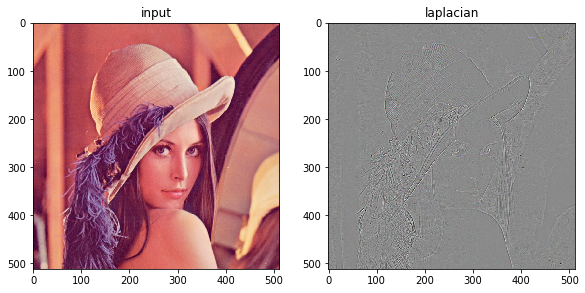

In [27]:
img = cv2.imread('data/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換
dst = cv2.Laplacian(img, cv2.CV_64F) # 負の値に対応するため64bit floatにする

### 以下，表示用コード ###
# 表示のために0～1の範囲に正規化
MIN = np.min(dst) 
MAX = np.max(dst)
dst = (dst-MIN)/(MAX-MIN)
from matplotlib import pyplot as plt
plt.imshow(dst)
plt.show()
print(dst)

matplotlib.pyplot.rcParams['figure.figsize'] = (15.0, 15.0) # 画像を大きく表示
subplot(1,3,1)
title('input')
imshow(img)
subplot(1,3,2)
title('laplacian')
imshow(dst)

# Cannyエッジ検出

以降は原理や詳細は省略するが，OpenCVに実装されている様々な画像処理技術について紹介する．<br>
詳しく知りたい人はこちらhttps://opencv-python-tutroals.readthedocs.io/en/latest/ <br>
（日本語訳）http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/index.html

Cannyエッジ検出とは，Sobelフィルタの後で2つの後処理（勾配の最大位置の検出と閾値処理）を行うことで，未検出・誤検出を減らしたエッジ検出手法である．

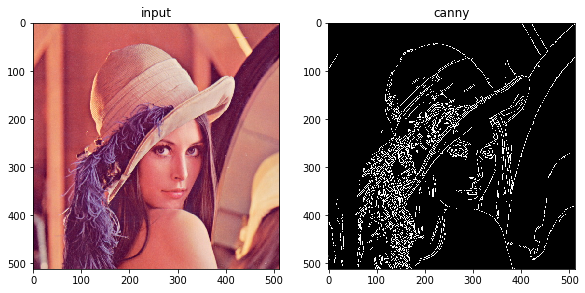

In [11]:
img = cv2.imread('data/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換

dst = cv2.Canny(img,100,200) # エッジ検出

subplot(1,3,1)
title('input')
imshow(img)
subplot(1,3,2)
title('canny')
imshow(dst, 'gray')

# Harrisコーナー検出


画像中のコーナーを検出する手法の代表例として，Harrisコーナー検出がある．

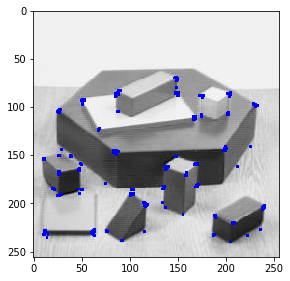

In [12]:
img = cv2.imread('data/blox.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

# コーナー検出
dst = cv2.cornerHarris(gray,2,3,0.04)

# 膨張処理により周辺の点をまとめる
dst = cv2.dilate(dst,None)

# 閾値処理
img[dst>0.01*dst.max()]=[0,0,255]

subplot(1,3,1)
imshow(img)

# ２値画像処理

## 閾値処理
閾値処理により，画像の2値化を行う．

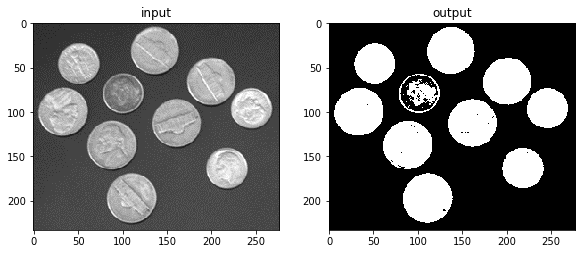

In [13]:
img = cv2.imread('data/coin.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY) # 127を閾値として閾値処理

subplot(1,3,1)
title('input')
imshow(img)
subplot(1,3,2)
title('output')
imshow(thresh, 'gray')

## 収縮と膨張
2値画像中の白領域を収縮させたり膨張させたりすることができる．

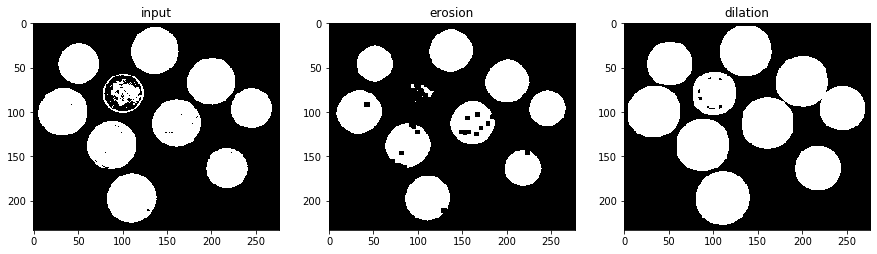

In [14]:
kernel = np.ones((5,5),np.uint8) # 5x5の範囲で収縮と膨張を行う
erosion = cv2.erode(thresh,kernel,iterations = 1) # 収縮
dilation = cv2.dilate(thresh,kernel,iterations = 1) # 膨張

subplot(1,3,1)
title('input')
imshow(thresh, 'gray')
subplot(1,3,2)
title('erosion')
imshow(erosion, 'gray')
subplot(1,3,3)
title('dilation')
imshow(dilation, 'gray')

## オープニングとクロージング
オープニングは収縮の後に膨張を行う処理であり，ノイズ除去に有効である．<br>
クロージングは膨張の後に収縮を行う処理であり，小さな穴を埋めることができる．

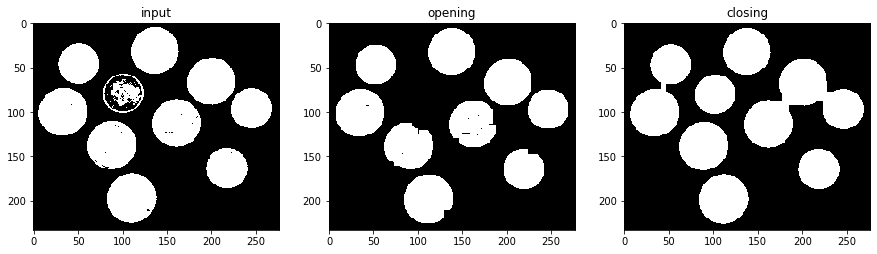

In [7]:
# オープニング
kernel = np.ones((10,10),np.uint8)
opening = cv2.erode(thresh,kernel,iterations = 1)
opening = cv2.dilate(opening,kernel,iterations = 1)

# クロージング
kernel = np.ones((8,8),np.uint8)
closing = cv2.dilate(thresh,kernel,iterations = 1)
closing = cv2.erode(closing,kernel,iterations = 1)

subplot(1,3,1)
title('input')
imshow(thresh, 'gray')
subplot(1,3,2)
title('opening')
imshow(opening, 'gray')
subplot(1,3,3)
title('closing')
imshow(closing, 'gray')

# 輪郭検出

輪郭を抽出し，面積や周囲長を計算することができる．

輪郭の面積：1586.0，周囲長：150.36753034591675


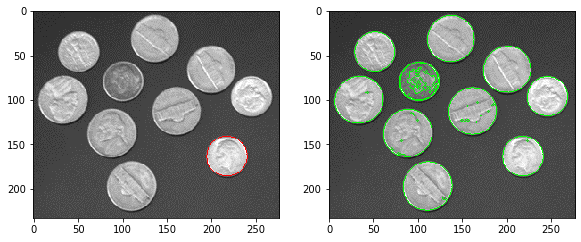

In [15]:
img = cv2.imread('data/coin.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray,127,255,0) # 最初に2値化する

(major, minor, _) = cv2.__version__.split('.') # OpenCVのバージョンを確認
if int(major) < 4:
    _, contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # 輪郭を抽出（OpenCV3以前は3つの返り値）
else:
    contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # 輪郭を抽出（OpenCV4以降は2つの返り値）

cnt_3 = img.copy()
n=2
cv2.drawContours(cnt_3, contours, n, (255,0,0), 1) # n番目の輪郭のみ描画
subplot(1,3,1)
imshow(cnt_3)

area = cv2.contourArea(contours[n]) # 面積の計算
perimeter = cv2.arcLength(contours[n],closed=True) # 周囲長の計算（輪郭が閉じているときはTrue）
print('輪郭の面積：{}，周囲長：{}'.format(area, perimeter))

cnt_all = img.copy()
cv2.drawContours(cnt_all, contours, -1, (0,255,0), 1) # 輪郭をすべて描画
subplot(1,3,2)
imshow(cnt_all)

# ハフ変換
## 直線検出
ハフ変換と呼ばれる手法で直線を検出することができる．

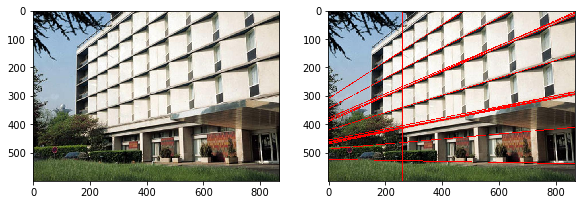

In [9]:
img = cv2.imread('data/building.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換
subplot(1,3,1)
imshow(img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3) # Cannyエッジ検出器

lines = cv2.HoughLines(edges,1,np.pi/180,250) # 直線検出

### 直線を描画 ###
for line in lines:
    rho = line[0,0]
    theta = line[0,1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
    
subplot(1,3,2)
imshow(img)

## 円検出

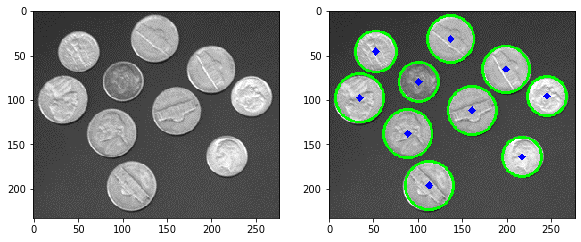

In [16]:
img = cv2.imread('data/coin.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換
subplot(1,3,1)
imshow(img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3) # Cannyエッジ検出器
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,param1=500,param2=30,minRadius=0,maxRadius=0) # 円検出

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # 外側の円を描画
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # 円の中心を描画
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

subplot(1,3,2)
imshow(img)

# ノイズ除去

Non-Local Means Denoisingと呼ばれる手法でノイズ除去を行うことができる．

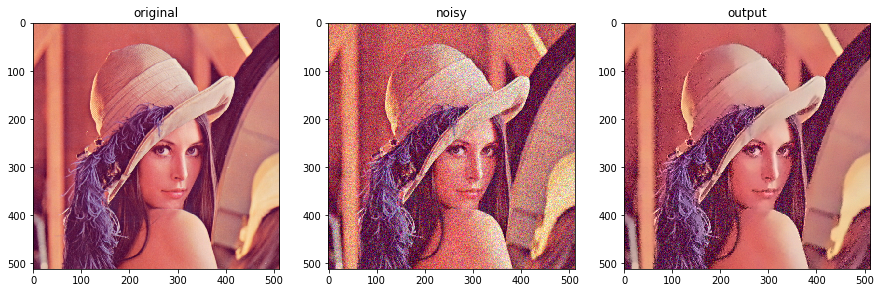

In [17]:
img = cv2.imread('data/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換

noisy = img.copy()
noisy = noisy.astype(np.float64)
noisy += np.random.normal(0, 25, noisy.shape) # ガウスノイズを付与
noisy = np.clip(noisy, 0, 255).astype(np.uint8) # 0～255の範囲に切り取る

dst = cv2.fastNlMeansDenoisingColored(noisy,None,10,10,7,21) # ノイズ除去

### 以下，表示用コード ###
subplot(1,3,1)
title('original')
imshow(img)

subplot(1,3,2)
title('noisy')
imshow(noisy)

subplot(1,3,3)
title('output')
imshow(dst)

# Inpainting処理

画像の欠損部分を埋める処理<br>
埋めたい領域をマスク画像で指定する

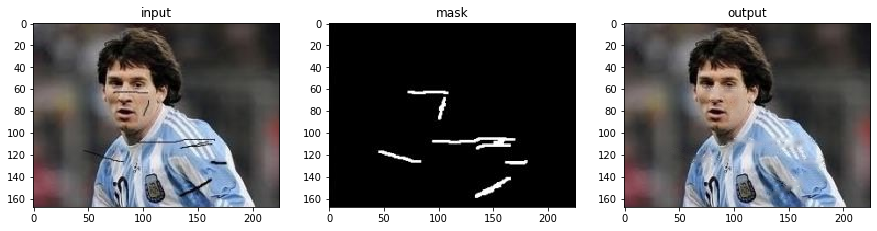

In [18]:
img = cv2.imread('data/messi_2.jpg')
mask = cv2.imread('data/mask2.png',0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換

dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA) # inpaint処理

### 以下，表示用コード ###
subplot(1,3,1)
title('input')
imshow(img)

subplot(1,3,2)
title('mask')
imshow(mask, 'gray')

subplot(1,3,3)
title('output')
imshow(dst)

# テンプレートマッチング
画像中に存在するテンプレート画像の位置を発見する

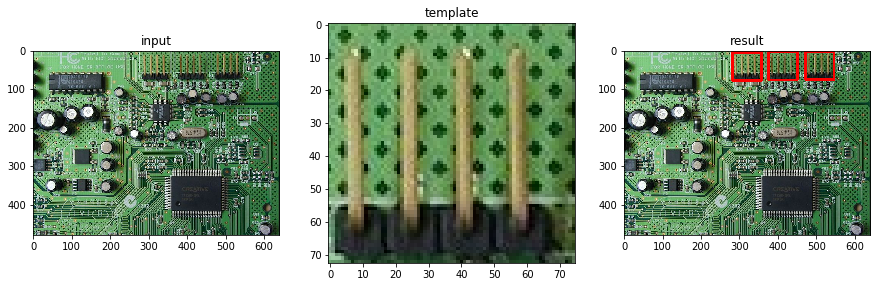

In [19]:
img = cv2.imread('data/board.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換
subplot(1,3,1)
title('input')
imshow(img)

template = cv2.imread('data/template.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換
h, w = template.shape[0:2]

res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED) # テンプレートマッチング

threshold = 0.6
loc = np.where(res >= threshold) # 類似度がthreshold以上の場所を取得

## 矩形を描画
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (255,0,0), 3)

subplot(1,3,2)
title('template')
imshow(template)
subplot(1,3,3)
title('result')
imshow(img)

# 前景背景領域分割
grabcutと呼ばれる手法で前景と背景の領域分割を行う<br>
マスク画像で大まかに前景と背景を指定すると，最適化計算により自動で領域分割が行われる

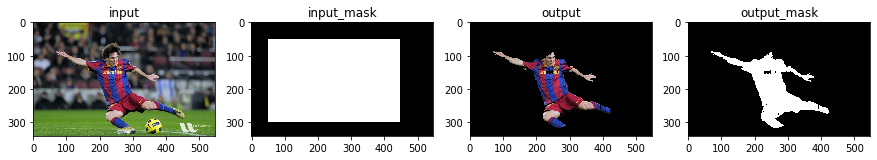

In [20]:
img = cv2.imread('data/messi5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # matplotlibによる画像の表示のためRGBの順に変換
subplot(1,4,1)
title('input')
imshow(img)

mask = np.ones(img.shape[:2], dtype=np.uint8)*2 # 背景だと思う領域を2で指定する
mask[50:300,50:450] = 3 # 前景だと思う領域を3にする
subplot(1,4,2)
title('input_mask')
imshow(mask, 'gray')

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

new_mask, new_bgdModel, newfgdModel = cv2.grabCut(img, mask, None, bgdModel, fgdModel, 5, mode=cv2.GC_INIT_WITH_MASK) # 領域分割

subplot(1,4,3)
title('output')
# 0:背景, 1:前景, 2:背景と思われる領域, 3:前景だと思われる領域
new_mask[new_mask==2] = 0
new_mask[new_mask==3] = 1
imshow(new_mask[:,:,np.newaxis]*img, 'gray')

subplot(1,4,4)
title('output_mask')
imshow(new_mask, 'gray')

# 背景差分

動画を入力すると自動で背景領域を推定し，領域分割を行う<br>
※下のコードの結果は別ウインドウで表示される

In [15]:
cap = cv2.VideoCapture('data/vtest.avi')
fgbg = cv2.createBackgroundSubtractorMOG2()

ret, frame = cap.read() # 1フレーム読み込む
while(ret == True): # 動画が終わるまで繰り返す
    fgmask = fgbg.apply(frame)
    cv2.imshow('frame', frame)
    cv2.imshow('mask', fgmask)
    key = cv2.waitKey(30) # 表示のために30ミリ秒待つ
    if key == 27: # ESCキーで終了
        break
    
    ret, frame = cap.read() # 次のフレームを読み込む
    
cap.release()
cv2.destroyAllWindows()

# オプティカルフロー
t番目のフレームの各画素が，t+1番目のフレームでどこに移動したかを表す2次元ベクトル(u,v)のことをオプティカルフローと呼ぶ<br>
※下のコードの結果は別ウインドウで表示される

In [16]:
def draw_flow(img, flow, step=16): 
    '''フロー表示用関数'''
    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int) # step(=16)画素ごとに座標を取得
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    cv2.polylines(img, lines, 0, (0, 255, 0)) # フローの向きに線を描画
    for (x1, y1), (_x2, _y2) in lines:
        cv2.circle(img, (x1, y1), 1, (0, 255, 0), -1) # step(=16)画素ごとに円を表示
    return img



cap = cv2.VideoCapture('data/vtest.avi') # 動画ファイルの読み込み

ret, prev_frame = cap.read() # 1フレーム読み込む
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY) # フローの計算のためグレースケールに変換
ret, next_frame = cap.read() # 1フレーム読み込む
while(ret == True): # 動画が終わるまで繰り返す
    next_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY) # フローの計算のためグレースケールに変換
    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0) # フローの計算
    prev_gray = next_gray
    
    cv2.imshow('flow', draw_flow(next_frame, flow)) # フローを表示
    key = cv2.waitKey(30) # 表示のために30ミリ秒待つ
    if key == 27: # ESCキーで終了
        break
    ret, next_frame = cap.read() # 次のフレームを読み込む
    
cap.release()
cv2.destroyAllWindows()